In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

def psi(x):
    #ar = np.zeros(x.shape[0])
    #for i in range(x.shape[0]):
        #print(tf.where(x[i][0] > 1 or x[i][0] < -1, 0.0, 1.0))
        #ar[i] = tf.where(x[i][0] > 1 or x[i][0] < -1, 0.0, 1.0)
    #return tf.convert_to_tensor(ar)
    return tf.where(x > 1 or x < -1, 0.0, 1.0)

def indicatrice(a,b):
    return lambda x: psi((2*x-b-a)/(b-a))

npart = 2
arr = np.linspace(-1, 1, npart + 1)

nn_indicatrici = [indicatrice(arr[i], arr[i+1]) for i in range(npart)]


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=1)

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.001717 s

Training model...

(20, 1)
(20, 1)
Tensor("partioned_random_fnn/Const:0", shape=(20, 1), dtype=float32)


c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Tensor("partioned_random_fnn/Const:0", shape=(20, 1), dtype=float32)
(102, 1)
(102, 1)
Tensor("partioned_random_fnn/Const:0", shape=(102, 1), dtype=float32)
Step      Train loss              Test loss               Test metric   
0         [1.69e+03, 3.49e+00]    [1.84e+03, 3.49e+00]    [2.61e+00]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
1         [1.66e+03, 3.47e+00]    [1.82e+03, 3.47e+00]    [2.60e+00]    

Best model at step 1:
  train loss: 1.67e+03
  test loss: 1.82e+03
  test metric: [2.60e+00]

'train' took 2.410339 s



In [4]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=1)


Compiling model...
'compile' took 0.000617 s

Training model...

(20, 1)
(20, 1)
Tensor("inputs:0", shape=(20, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(20, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(20, 1), dtype=float32)
Tensor("inputs:0", shape=(20, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(20, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(20, 1), dtype=float32)


c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


(102, 1)
(102, 1)
Tensor("inputs:0", shape=(102, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(102, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(102, 1), dtype=float32)
Step      Train loss              Test loss               Test metric   
0         [8.62e+02, 5.50e-01]    [9.29e+02, 5.50e-01]    [1.08e+00]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
1000      [7.44e+00, 1.00e-02]    [6.03e+00, 1.00e-02]    [7.18e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
2000      [9.89e-02, 1.47e-01]    [9.67e-02, 1.47e-01]    [3.15e-01]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
3000      [6.81e-02, 4.29e-02]    [6.06e-02, 4.29e-02]    [1.71e-01]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
4000      [5.06e-02, 3.32e-03]    [4.23e-02, 3.32e-03]    [4.77e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
5000      [4.16e-02, 3.17e-04]    [3.33e-02, 3.17e-04]    [1.44e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
6000      [3.67e-02, 1.20e-03]    [2.90e-02, 1.20e-03]    [2.82e-02]    
(20

In [3]:
x = tf.convert_to_tensor(np.ones((20, 10)))
y = tf.convert_to_tensor(np.ones((20, 1)))

print(tf.math.multiply(y, x))

tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(20, 10), dtype=float64)


In [34]:
geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

def psi_2(x):
    arr = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] < -1 or x[i] > 1:
            arr[i] = 0
    return arr

def indicatrice_2(a,b):
    return lambda x: psi_2((2*x-b-a)/(b-a))

npart = 2
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici_2 = [indicatrice_2(arr[i], arr[i+1]) for i in range(npart)]

train_indicatrici = [nn_indicatrici_2[i](data.train_x) for i in range(npart)]
test_indicatrici = [nn_indicatrici_2[i](data.test_x) for i in range(npart)]

Compiling model...
'compile' took 0.000506 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.77e+02, 5.28e-01]    [1.80e+02, 5.28e-01]    [1.49e+00]    
1000      [4.28e-03, 3.87e-07]    [5.65e-03, 3.87e-07]    [6.74e-02]    
2000      [4.07e-03, 1.85e-07]    [5.32e-03, 1.85e-07]    [7.21e-02]    
3000      [3.76e-03, 1.70e-07]    [4.94e-03, 1.70e-07]    [7.99e-02]    
4000      [3.53e-03, 6.68e-08]    [4.73e-03, 6.68e-08]    [9.31e-02]    
5000      [2.79e-03, 9.03e-08]    [3.76e-03, 9.03e-08]    [1.13e-01]    
6000      [2.65e-03, 1.97e-07]    [3.58e-03, 1.97e-07]    [1.40e-01]    
7000      [1.92e-03, 8.26e-08]    [2.65e-03, 8.26e-08]    [1.75e-01]    
8000      [1.37e-03, 2.46e-08]    [1.91e-03, 2.46e-08]    [2.17e-01]    
9000      [1.02e-03, 1.17e-08]    [1.44e-03, 1.17e-08]    [2.66e-01]    
10000     [3.49e-03, 1.42e-06]    [4.09e-03, 1.42e-06]    [3.19e-01]    
11000     [1.36e-03, 8.13e-07]    [1.57e-03, 8.13e-07]    [3.75e-01]    
12000     [4.08e-03, 4.00e-06]  

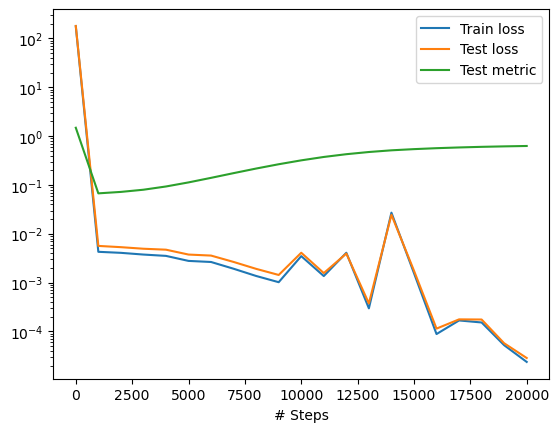

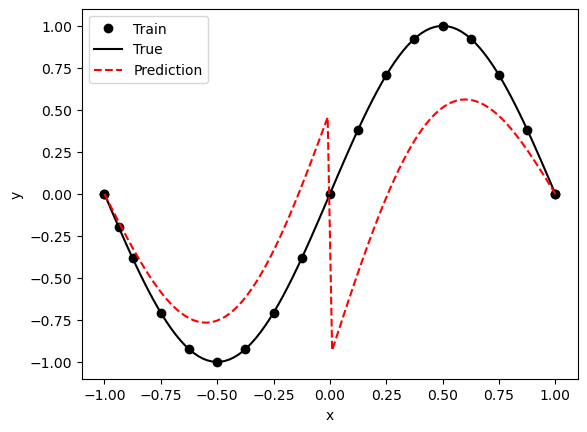

In [4]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

pi = np.pi

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

#print(data.train_x)

def psi_2(x):
    arr = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] < -1 or x[i] > 1:
            arr[i] = 0
    return arr

def indicatrice_2(a,b):
    return lambda x: psi_2((2*x-b-a)/(b-a))

npart = 2
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici_2 = [indicatrice_2(arr[i], arr[i+1]) for i in range(npart)]

train_indicatrici = [nn_indicatrici_2[i](data.train_x) for i in range(npart)]
test_indicatrici = [nn_indicatrici_2[i](data.test_x) for i in range(npart)]

M = 100
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, train_indicatrici, test_indicatrici, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)